In [1]:
import numpy as np

def simulate_experiment(N=100000, rho=0.0):
    np.random.seed(123)
    
    mu = np.array([0.0, 1.0, 0.0])  
    
    Sigma = np.array([
        [1.0,   rho,  rho],
        [rho,   1.0,  rho],
        [rho,   rho,  1.0]
    ])
    
    data = np.random.multivariate_normal(mean=mu, cov=Sigma, size=N)
    eta0 = data[:, 0]
    eta1 = data[:, 1]
    nu   = data[:, 2]
    
    D = (nu > 0).astype(int)
    
    Y = eta0 + eta1 * D
    
    diff_in_means = Y[D==1].mean() - Y[D==0].mean()
    
    true_ate = eta1.mean()
    
    return diff_in_means, true_ate

N = 100000

diff_in_means_ind, true_ate_ind = simulate_experiment(N=N, rho=0.0)
print("Independent scenario (rho=0):")
print(f"  Empirical Diff in Means = {diff_in_means_ind:.3f}")
print(f"  True ATE (mean of eta1) = {true_ate_ind:.3f}")
print()

diff_in_means_dep, true_ate_dep = simulate_experiment(N=N, rho=0.5)
print("Dependent scenario (rho=0.5):")
print(f"  Empirical Diff in Means = {diff_in_means_dep:.3f}")
print(f"  True ATE (mean of eta1) = {true_ate_dep:.3f}")


Independent scenario (rho=0):
  Empirical Diff in Means = 1.009
  True ATE (mean of eta1) = 1.006

Dependent scenario (rho=0.5):
  Empirical Diff in Means = 2.189
  True ATE (mean of eta1) = 0.997


/var/folders/zy/53q03bqx77bflc8psn3qmjrm0000gn/T/ipykernel_94332/3604208714.py:15: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal(mean=mu, cov=Sigma, size=N)


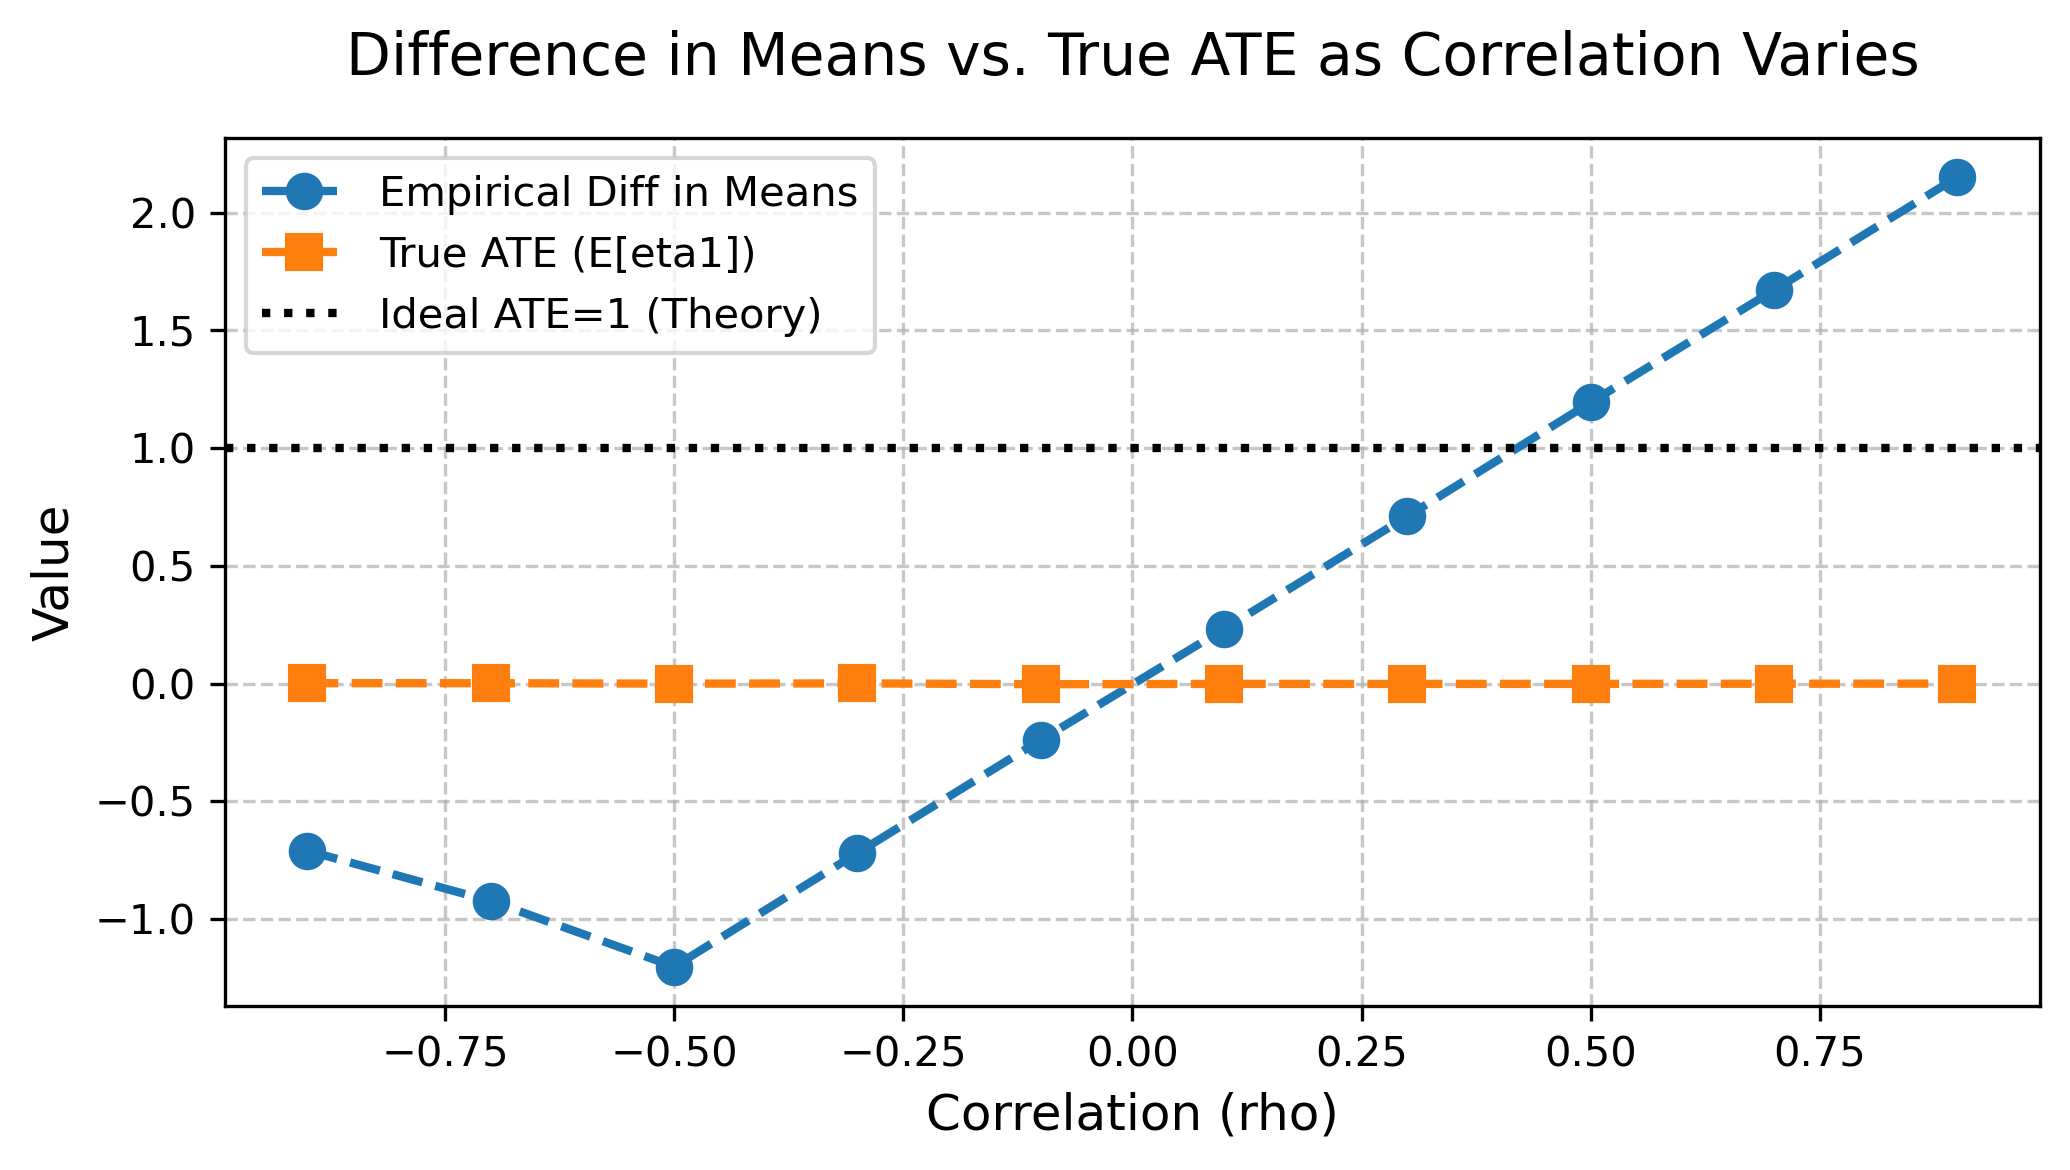

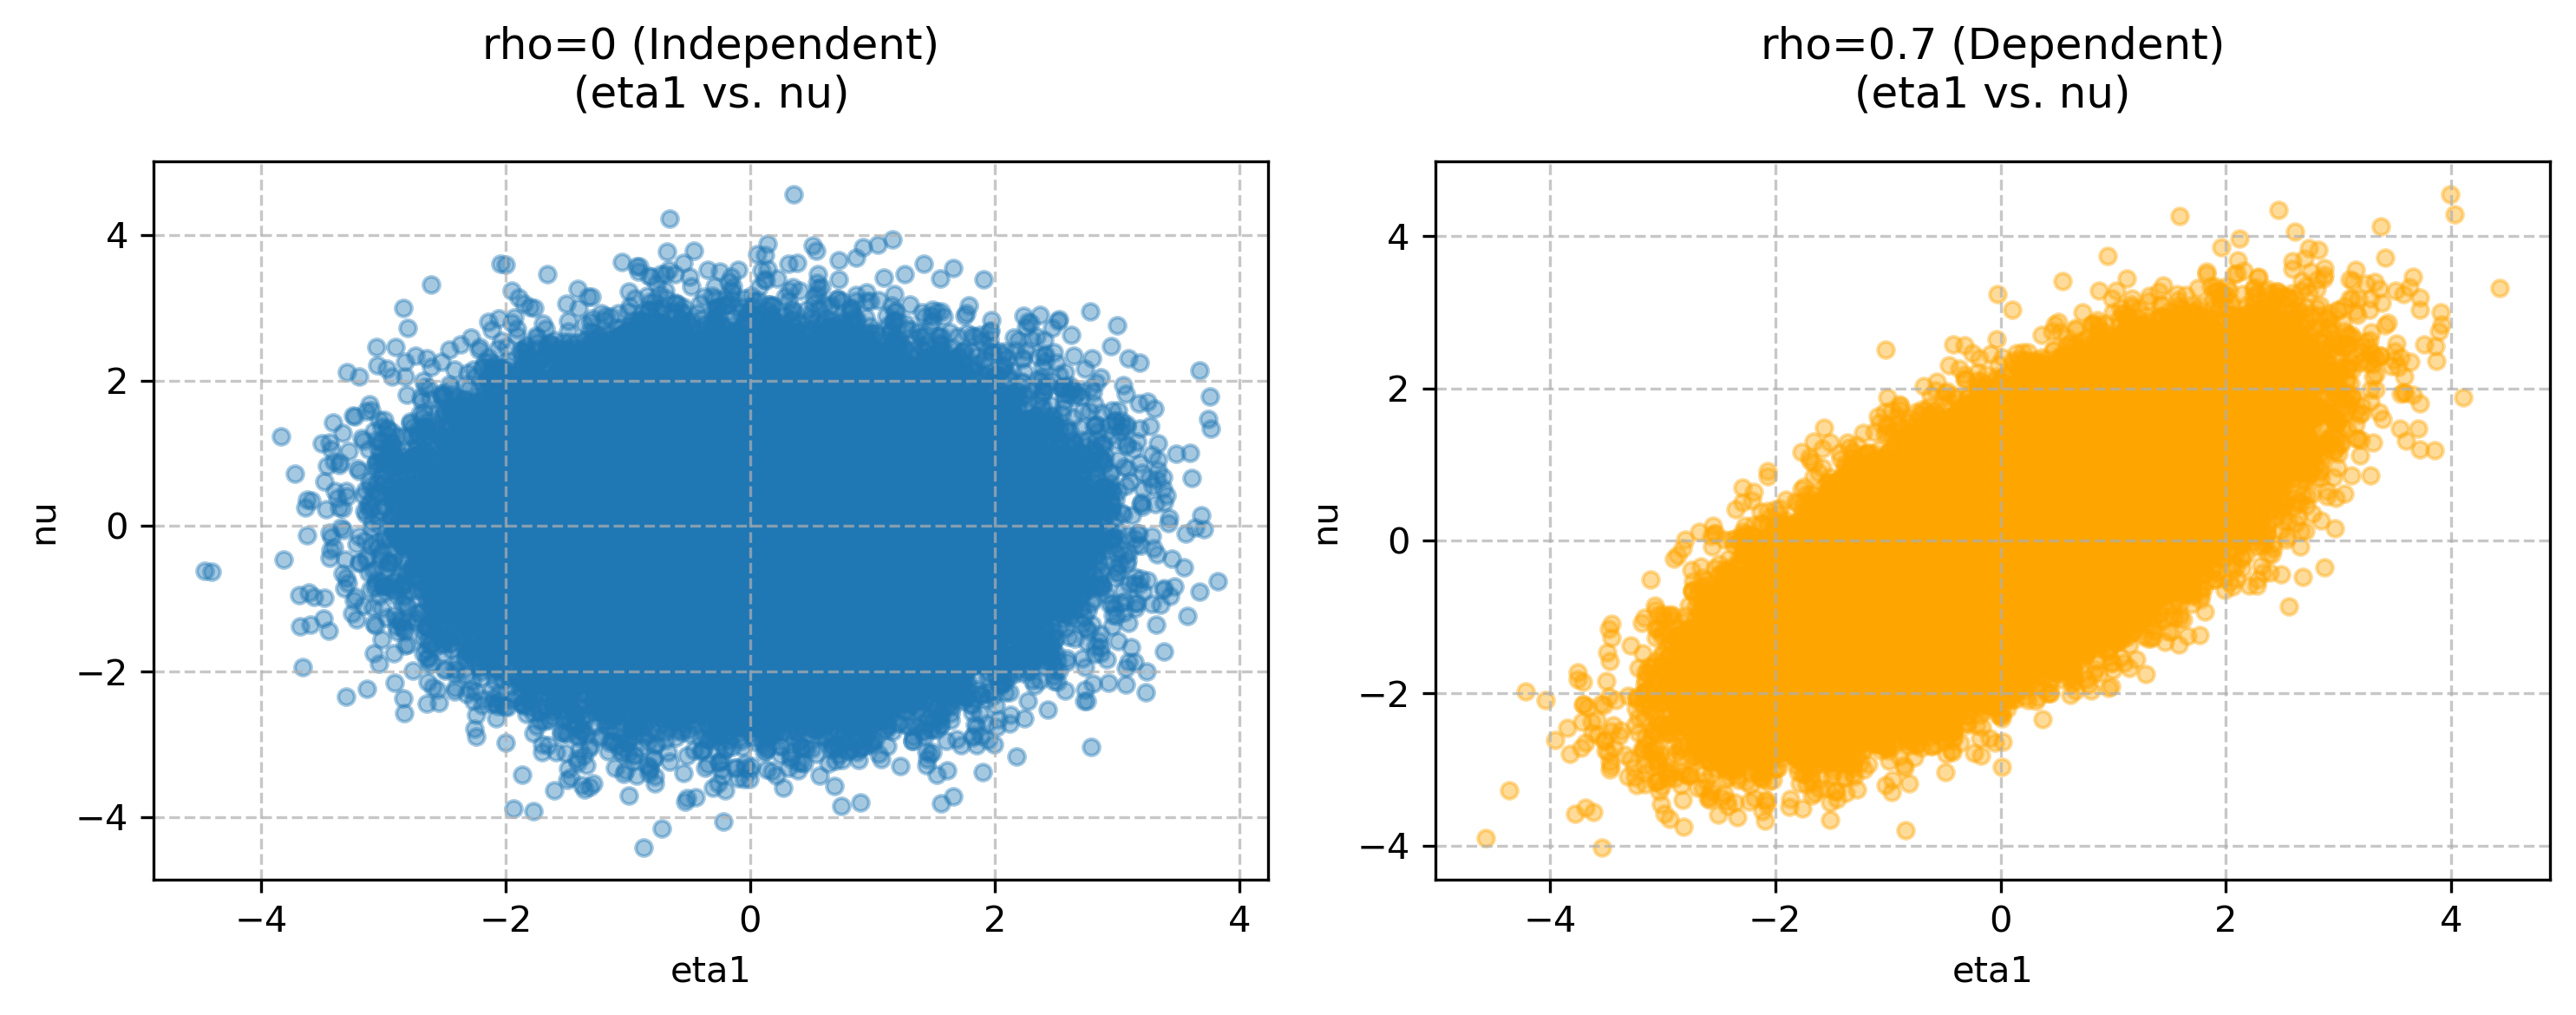

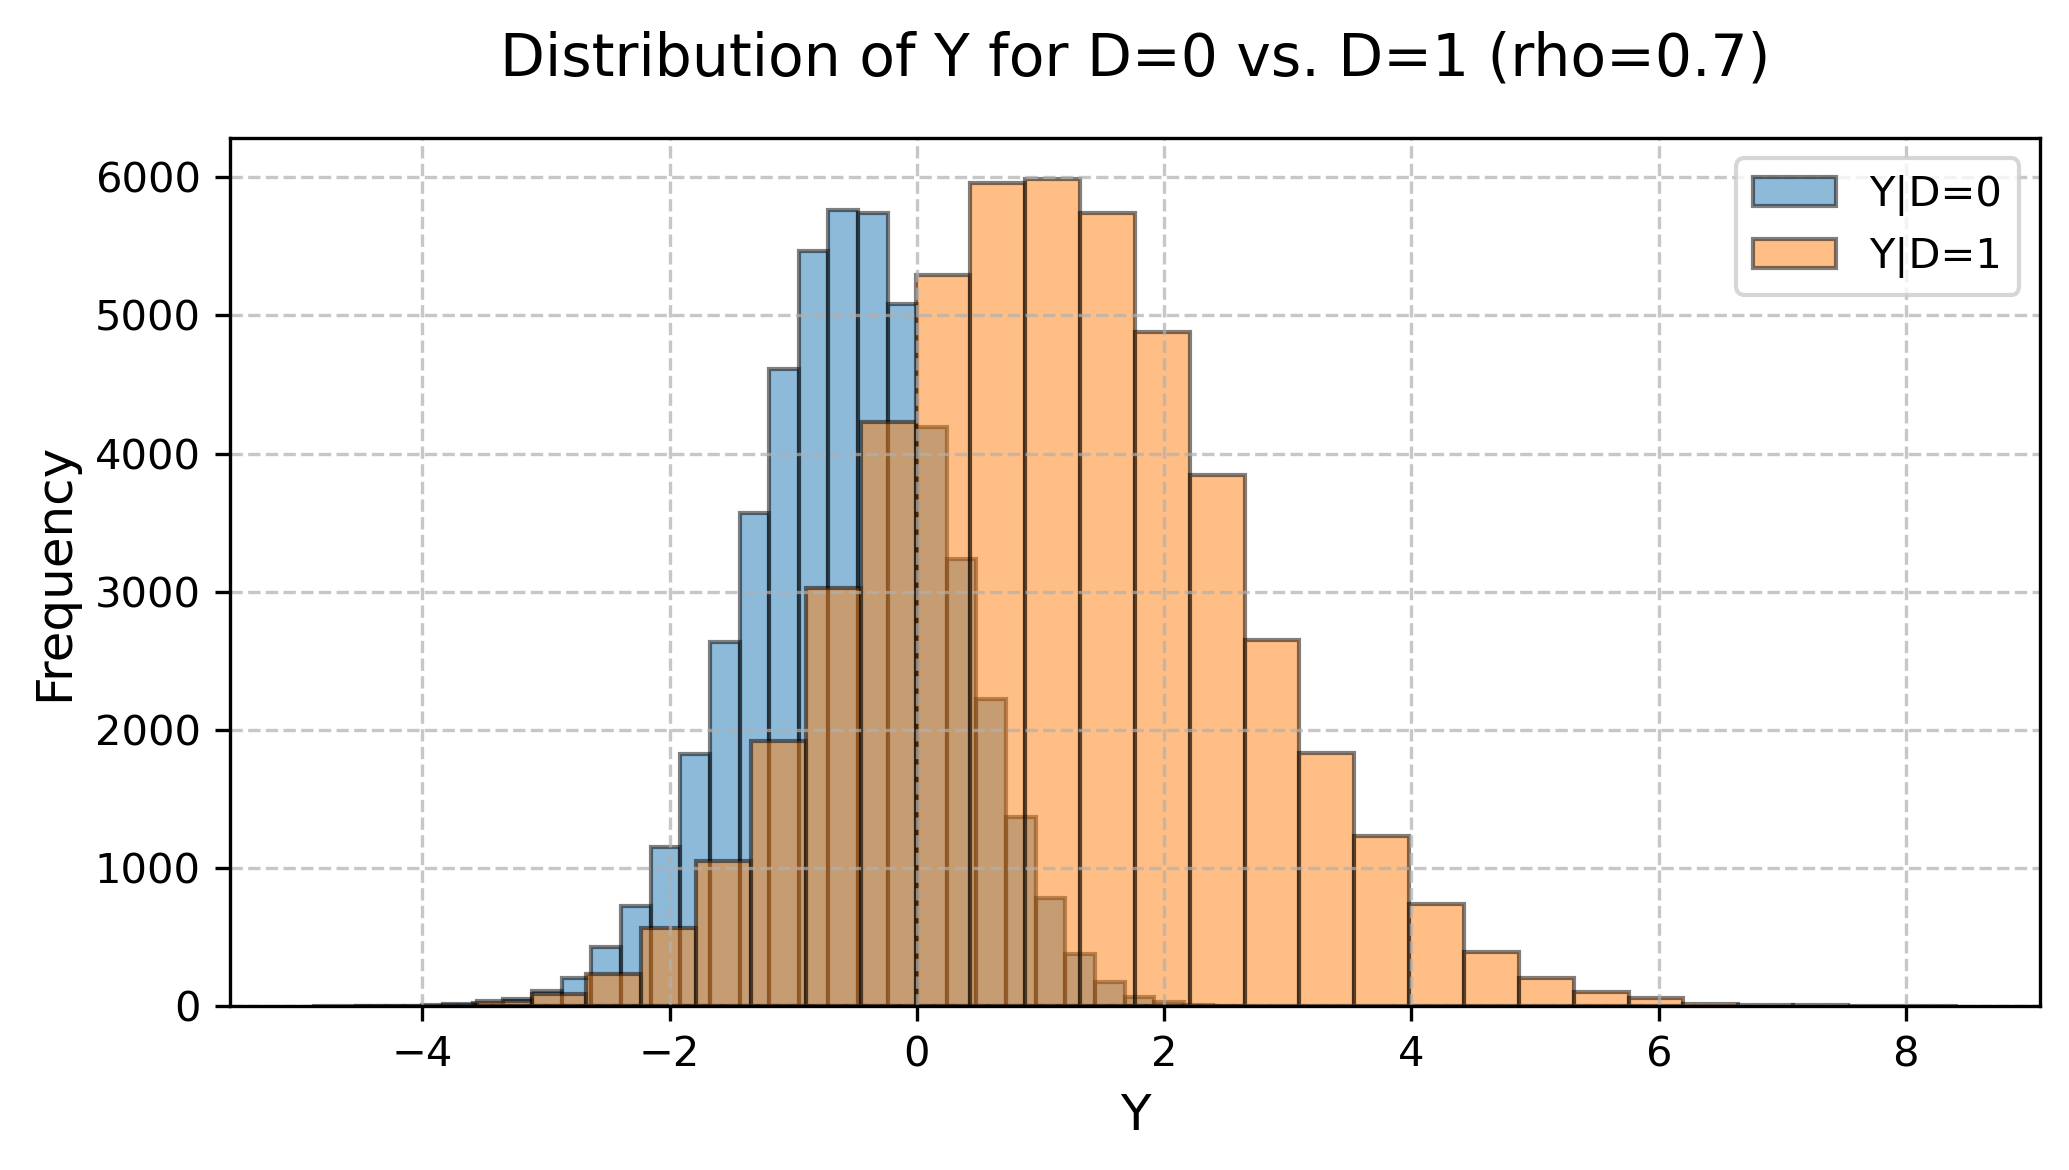

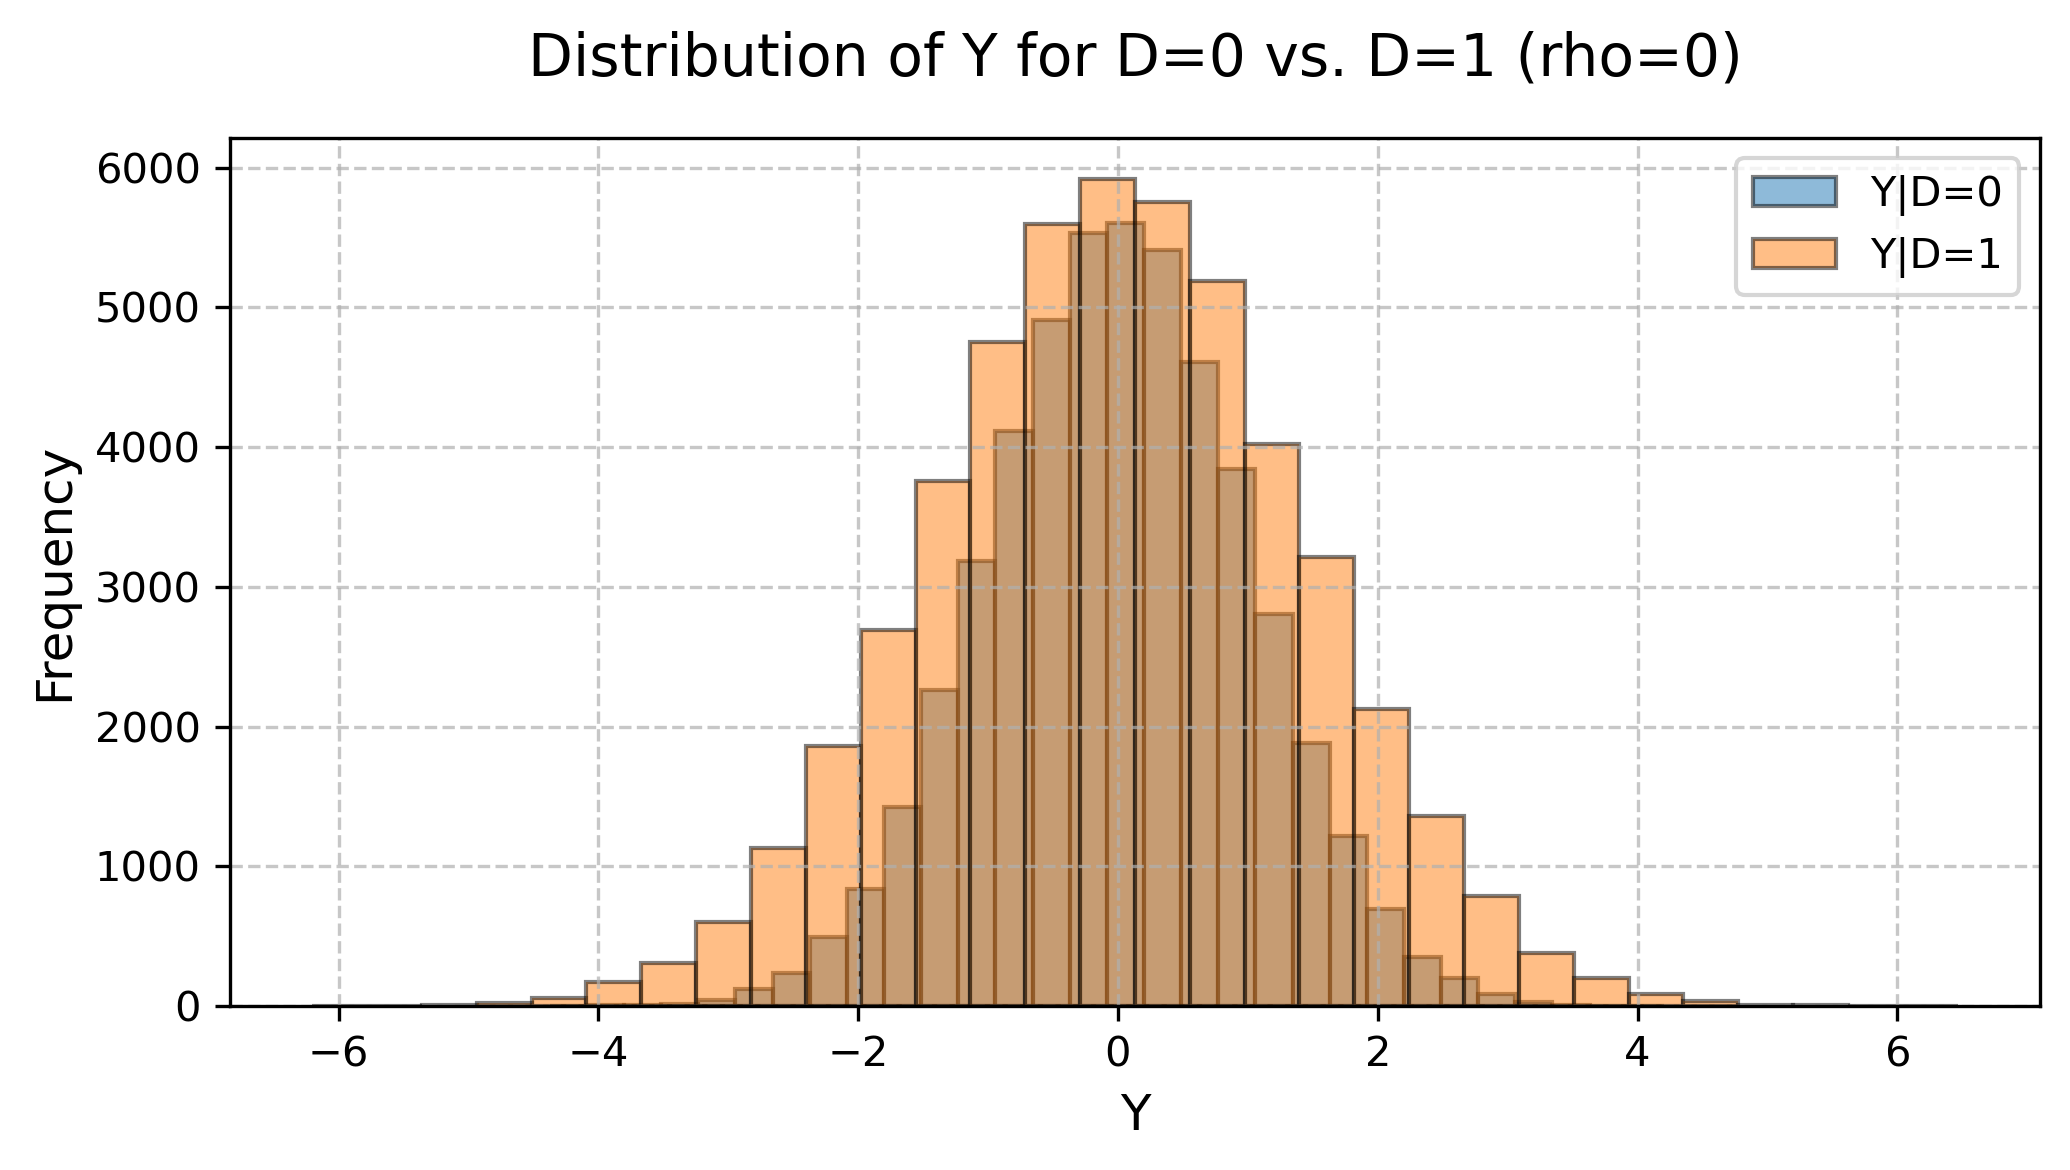

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_experiment(N=100_000, rho=0.0, random_seed=123):
    np.random.seed(random_seed)
    
    mu = np.array([0.0, 0.0, 0.0])
    
    Sigma = np.array([
        [1.0,   rho,  rho],
        [rho,   1.0,  rho],
        [rho,   rho,  1.0]
    ])
    
    data = np.random.multivariate_normal(mean=mu, cov=Sigma, size=N)
    eta0 = data[:, 0]
    eta1 = data[:, 1]
    nu   = data[:, 2]
    
    D = (nu > 0).astype(int)
    
    Y = eta0 + eta1 * D
    
    diff_in_means = Y[D==1].mean() - Y[D==0].mean()
    
    true_ate = eta1.mean()
    
    return diff_in_means, true_ate, (eta0, eta1, nu, D, Y)

rhos = np.linspace(-0.9, 0.9, 10)
N = 200_000

diffs = []
ates = []

for r in rhos:
    diff_m, ate, _ = simulate_experiment(N=N, rho=r, random_seed=123)
    diffs.append(diff_m)
    ates.append(ate)

# First plot
plt.figure(figsize=(7, 4), dpi=300)
plt.plot(rhos, diffs, 'o--', label='Empirical Diff in Means', linewidth=2, markersize=8)
plt.plot(rhos, ates, 's--', label='True ATE (E[eta1])', linewidth=2, markersize=8)
plt.axhline(y=1, color='k', linestyle=':', label='Ideal ATE=1 (Theory)', linewidth=2)
plt.xlabel('Correlation (rho)', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Difference in Means vs. True ATE as Correlation Varies', fontsize=14, pad=15)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('correlation_effects.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Scatter plots
_, _, (eta0_0, eta1_0, nu_0, D_0, Y_0) = simulate_experiment(N=100_000, rho=0.0, random_seed=42)
_, _, (eta0_7, eta1_7, nu_7, D_7, Y_7) = simulate_experiment(N=100_000, rho=0.7, random_seed=42)

fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=300)

axes[0].scatter(eta1_0, nu_0, alpha=0.4, s=20)
axes[0].set_title('rho=0 (Independent)\n(eta1 vs. nu)', fontsize=12, pad=15)
axes[0].set_xlabel('eta1', fontsize=10)
axes[0].set_ylabel('nu', fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.7)

axes[1].scatter(eta1_7, nu_7, alpha=0.4, color='orange', s=20)
axes[1].set_title('rho=0.7 (Dependent)\n(eta1 vs. nu)', fontsize=12, pad=15)
axes[1].set_xlabel('eta1', fontsize=10)
axes[1].set_ylabel('nu', fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('scatter_comparison.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Histogram for rho=0.7
plt.figure(figsize=(7, 4), dpi=300)
Y0 = Y_7[D_7 == 0]
Y1 = Y_7[D_7 == 1]

plt.hist(Y0, bins=30, alpha=0.5, label='Y|D=0', edgecolor='black')
plt.hist(Y1, bins=30, alpha=0.5, label='Y|D=1', edgecolor='black')
plt.xlabel('Y', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Y for D=0 vs. D=1 (rho=0.7)', fontsize=14, pad=15)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('histogram_rho_07.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Histogram for rho=0
plt.figure(figsize=(7, 4), dpi=300)
Y0 = Y_0[D_0 == 0]
Y1 = Y_0[D_0 == 1]

plt.hist(Y0, bins=30, alpha=0.5, label='Y|D=0', edgecolor='black')
plt.hist(Y1, bins=30, alpha=0.5, label='Y|D=1', edgecolor='black')
plt.xlabel('Y', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Y for D=0 vs. D=1 (rho=0)', fontsize=14, pad=15)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('histogram_rho_0.pdf', bbox_inches='tight', dpi=300)
plt.show()
